In [17]:
import os # 경고 대응
os.environ['OMP_NUM_THREADS'] = '1'

import pandas as pd
import numpy as np

df = pd.read_csv("인구밀도_전처리1.csv")
df1 = df.set_index("지역")

df1

,5대범죄 건수 평균,인구밀도 평균,112신고 건수 평균,여성 가구원수 평균,cctv수 평균,가로등수 평균,경찰서 및 파출소 수,지역별인구수
지역,,,,,,,,
강남구,7544,14085,170421,261915,870,8887,25,556353
강동구,4164,18329,89580,212260,320,8634,20,450704
강북구,3461,13607,74903,154574,428,7434,13,321125
강서구,4862,14388,114848,287359,323,5861,16,596229
관악구,5372,17500,112705,253622,536,4857,12,517456
광진구,4356,21520,86649,181477,405,8152,22,367193
구로구,4726,21850,86007,212753,429,5947,18,439610
금천구,3161,19343,63704,120722,308,5478,26,251840
노원구,4173,15459,89983,265684,309,4388,15,547850


In [19]:
f1 = df1.iloc[:,2:3]
test=np.array(f1)
test # target. 5대 범죄 배열.


array([[170421],
       [ 89580],
       [ 74903],
       [114848],
       [112705],
       [ 86649],
       [ 86007],
       [ 63704],
       [ 89983],
       [ 54899],
       [ 69205],
       [107486],
       [ 64242],
       [ 98124],
       [ 57321],
       [ 75245],
       [127503],
       [ 74413],
       [113342],
       [ 73441],
       [ 86552],
       [ 74266],
       [128959],
       [ 87161]], dtype=int64)

In [22]:
train = np.array(df1[df1.columns.difference(['112신고건수'])]) # data
input=np.column_stack(train) 
output=test
a = input.T # test와 배열 맞추기.
a

array([[170421,   7544,    870,   8887,     25, 261915,  14085, 556353],
       [ 89580,   4164,    320,   8634,     20, 212260,  18329, 450704],
       [ 74903,   3461,    428,   7434,     13, 154574,  13607, 321125],
       [114848,   4862,    323,   5861,     16, 287359,  14388, 596229],
       [112705,   5372,    536,   4857,     12, 253622,  17500, 517456],
       [ 86649,   4356,    405,   8152,     22, 181477,  21520, 367193],
       [ 86007,   4726,    429,   5947,     18, 212753,  21850, 439610],
       [ 63704,   3161,    308,   5478,     26, 120722,  19343, 251840],
       [ 89983,   4173,    309,   4388,     15, 265684,  15459, 547850],
       [ 54899,   2214,    233,   4499,     10, 162299,  16407, 339109],
       [ 69205,   3280,    245,   6441,     22, 199862,  24884, 406964],
       [107486,   4892,    329,   5910,     12, 190437,  16220, 386836],
       [ 64242,   3052,    258,   8085,     17, 162843,  18313, 322695],
       [ 98124,   4809,    550,   7817,     17, 205

In [23]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output=train_test_split(a,output) # 스케일링된 값과 

In [24]:
from xgboost import XGBRegressor
from sklearn.metrics import explained_variance_score

xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb_model.fit(train_input,train_output)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

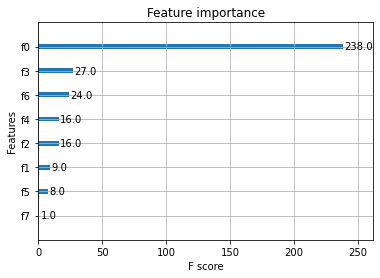

In [25]:
xgboost.plot_importance(xgb_model)

In [26]:
predictions = xgb_model.predict(test_input)
predictions

array([ 86010.08, 127567.84,  86031.43,  86388.29,  74840.96,  73969.07],
      dtype=float32)

In [27]:
r_sq = xgb_model.score(train_input, train_output)
print(r_sq)
print(explained_variance_score(predictions,test_output))

0.9981049747587928
0.9995632146899398
